In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

def read_csv(train_path, test_path):
    train_dataset = np.genfromtxt(train_path,delimiter=',',dtype=int)
    test_dataset = np.genfromtxt(test_path,delimiter=',',dtype=int)

    '''
        Parse images and labels from training and testing dataset
    '''
    labels_train = train_dataset[1:,0]
    images_train = train_dataset[1:,1:]

    labels_test = test_dataset[1:,0]
    images_test = test_dataset[1:,1:]
    
    return images_train, labels_train, images_test, labels_test
    
    
'''
    Calculates euclidean distance
'''
def euclideanDistance(data_1, data_2, num_feat):
    dist = 0
    for feat in range(num_feat):
        dist += pow((data_1[feat] - data_2[feat]), 2)
        
    return np.sqrt(dist)


'''
    Returns the indices of nearest neighbors
'''
def getNeighbors(data_1, data_2, k):
    row, col = data_1.shape
    
    distances = []
    for each_data in data_1:
        dist = euclideanDistance(each_data, data_2, col)
        distances.append(dist)
        
    nn_index = np.argsort(distances)[:k]
    
    return nn_index


'''
    Returns the highest predicted neighbor
'''
def getPrediction(neighbors, gt_labels):
    preds = []
    for index in neighbors:
        preds.append(gt_labels[index])
    total_preds = np.array(preds, dtype='int')
    total_bins = np.bincount(total_preds)
    highest_preds = np.argmax(total_bins)
    return highest_preds


'''
    Calculates prediction
'''
def knn_predict(images_train, labels_train, images_test, k):
    prediction_list = []
    for each_data in images_test:
        neighbors = getNeighbors(images_train, each_data, k)
        prediction = getPrediction(neighbors, labels_train)
        prediction_list.append(prediction)
    return np.array(prediction_list)


'''
    Calculates accuracy
'''
def getAccuracy(gt_labels, pred_labels):
    correct = 0
    if(gt_labels.size != pred_labels.size):
        print("Ground Truth and Prediction Labels vectors are not equal size")
        return
    else:
        total = pred_labels.size
        correct += (pred_labels == gt_labels).sum()
        return (100 * correct / total)

    
'''
    Calculates accuracy of each class
'''
def getAccuracyEachClass(gt_labels, pred_labels):
    each_class_acc = []
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    
    c = (pred_labels == gt_labels)
    for i in range(gt_labels.size):
        label = gt_labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
    for i in range(10):
        acc = 100 * class_correct[i] / class_total[i]
        each_class_acc.append(acc)
        
    return each_class_acc


'''
    Returns accuracy of each class and overall accuracy
'''
def kNN(images_train, labels_train, images_test, labels_test, k):
    total_data = labels_train.size
    labels_pred = knn_predict(images_train, labels_train, images_test, k)
    acc = getAccuracyEachClass(labels_test, labels_pred)
    acc_av = getAccuracy(labels_test, labels_pred)

    return acc, acc_av

In [3]:
total_k_acc = []
total_k_acc_av = []

# Values of k according to the question
k_list = [1, 2, 3, 5, 10]

# To select training data points from 30 to 10000
dataset_list = np.logspace(1.477212,4,10).astype(dtype=int)

# Read training/testing dataset
images_train, labels_train, images_test, labels_test = read_csv('../data/train.csv','../data/test.csv')

In [11]:
'''
    Solution to 7(c)
'''

def question_7c():
    for k in k_list:
        total_ds_acc = []
        total_ds_acc_av = []
        for ds in dataset_list:
            small_images_train = images_train[0:int(ds),0:]
            small_labels_train = labels_train[0:int(ds)]
            small_images_test = images_test[0:1000,0:]
            small_labels_test = labels_test[0:1000]
            
            since = time.time()
            acc, acc_av = kNN(small_images_train, small_labels_train, small_images_test, small_labels_test, k)
            time_taken = time.time() - since
            
            total_ds_acc.append(acc)
            total_ds_acc_av.append(acc_av)
        
            print('**********Results of kNN with k = %d with %d datasize***************' % (k,ds))
            for i in range(10):
                print('Accuracy of %s : %.2f %%' % (classes[i], acc[i]))
            print('Overall accuray of kNN : %.2f %%' % acc_av)
            print('Time taken to test 1000 images on %d datasize = %.2f minutes' % (ds, time_taken/60))
            print()
                  
        total_k_acc_av.append(total_ds_acc_av)
        total_k_acc.append(total_ds_acc)

In [ ]:
question_7c()

**********Results of kNN with k = 1 with 30 datasize***************
Accuracy of 0 : 83.53 %
Accuracy of 1 : 100.00 %
Accuracy of 2 : 33.62 %
Accuracy of 3 : 42.99 %
Accuracy of 4 : 24.55 %
Accuracy of 5 : 48.28 %
Accuracy of 6 : 40.23 %
Accuracy of 7 : 75.51 %
Accuracy of 8 : 21.35 %
Accuracy of 9 : 29.47 %
Overall accuray of kNN : 50.70 %
Time taken to test 1000 images on 30 datasize = 0.25 minutes

**********Results of kNN with k = 1 with 57 datasize***************
Accuracy of 0 : 76.47 %
Accuracy of 1 : 100.00 %
Accuracy of 2 : 38.79 %
Accuracy of 3 : 45.79 %
Accuracy of 4 : 46.36 %
Accuracy of 5 : 37.93 %
Accuracy of 6 : 55.17 %
Accuracy of 7 : 75.51 %
Accuracy of 8 : 15.73 %
Accuracy of 9 : 53.68 %
Overall accuray of kNN : 55.60 %
Time taken to test 1000 images on 57 datasize = 0.49 minutes

**********Results of kNN with k = 1 with 109 datasize***************
Accuracy of 0 : 88.24 %
Accuracy of 1 : 99.21 %
Accuracy of 2 : 61.21 %
Accuracy of 3 : 60.75 %
Accuracy of 4 : 62.73 %
Acc

In [ ]:
'''
    Display graph for question 7(d)
'''

fig1, ax1 = plt.subplots()
ax1.plot(dataset_list, total_k_acc_av[0],'-o')
ax1.yaxis.set_major_locator(ticker.MaxNLocator(10))
ax1.set_xlabel('Number of training data')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Accuracy of kNN on 10 different dataset when k = 1')

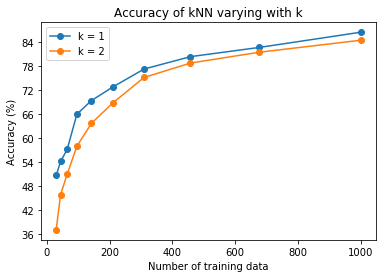

In [35]:
'''
    Solution to 7(d)
'''

# x = np.logspace(1.477212,3,10).astype(dtype=int)

fig1, ax1 = plt.subplots()
ax1.plot(dataset_list, total_k_acc_av[0], '-o')
ax1.plot(dataset_list, total_k_acc_av[1], '-o')
ax1.plot(dataset_list, total_k_acc_av[2], '-o')
ax1.plot(dataset_list, total_k_acc_av[3], '-o')
ax1.plot(dataset_list, total_k_acc_av[4], '-o')
ax1.yaxis.set_major_locator(ticker.MaxNLocator(10))
ax1.legend(['k = 1', 'k = 2', 'k = 3', 'k = 5', 'k = 10'], loc='upper left')
ax1.set_xlabel('Number of training data')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Accuracy of kNN varying with k')


In [ ]:
'''
    Solution to 7(e)
'''

small_images_train = images_train[0:2000,0:]
small_labels_train = labels_train[0:2000]

def question_7e():
    total_k_acc_av = []
    best_k = 0
    
    for k in k_list:
        very_small_images_train = small_images_train[0:1000,0:]
        very_small_labels_train = labels_train[0:1000]

        very_small_images_val = small_images_train[1000:2000,0:]
        very_small_labels_val = labels_train[1000:2000]

        _, acc_av = kNN(very_small_images_train, very_small_labels_train, very_small_images_val, very_small_labels_val, k)
        
        if acc_av > best_k:
            best_k = acc_av

        total_k_acc_av.append(acc_av)

        print('**********Results of kNN when k = %d***************' % k)
        print('Overall accuray of kNN : %.2f %%' % acc_av)
        print()
        
    print('Best k = ', best_k)
        
    return total_k_acc_av

In [39]:
acc_av_each_k = question_7e()

**********Results of kNN when k = 1***************
Overall accuray of kNN : 87.40 %

**********Results of kNN when k = 2***************
Overall accuray of kNN : 85.40 %

**********Results of kNN when k = 3***************
Overall accuray of kNN : 87.70 %

**********Results of kNN when k = 5***************
Overall accuray of kNN : 86.80 %

**********Results of kNN when k = 10***************
Overall accuray of kNN : 84.70 %



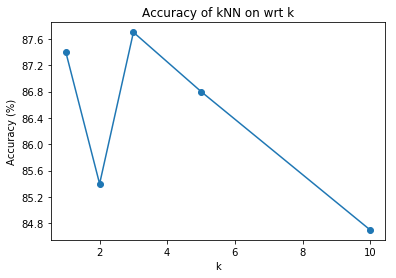

In [41]:
'''
    Display graph for question 7(e)
'''

fig1, ax1 = plt.subplots()
ax1.plot(k_list, acc_av_each_k, '-o')
ax1.yaxis.set_major_locator(ticker.MaxNLocator(10))
ax1.set_xlabel('k')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Accuracy of kNN on wrt k')